In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter, MaxNLocator, ScalarFormatter
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import statsmodels.api as sm


In [2]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")
datajhsoa=pd.read_csv("groupedjhSOA.csv")
datacmsoa=pd.read_csv("groupedcmSOA.csv")

In [3]:

datajhsoa["SOA"] = 0
datajh["SOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("0.25um")):(datajhsoa.columns.get_loc("0.30um"))]:
    datajhsoa["SOA"] = datajhsoa["SOA"] + datajhsoa[i]
    datajh["SOA"] = datajh["SOA"] + datajh[i]
datajhsoa["CSOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("C0.25um")):(datajhsoa.columns.get_loc("C0.30um"))]:
    datajhsoa["CSOA"] = datajhsoa["CSOA"] + datajhsoa[i]
datacmsoa["SOA"] = 0
datacm["SOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("0.25um")):(datacmsoa.columns.get_loc("0.30um"))]:
    datacmsoa["SOA"] = datacmsoa["SOA"] + datacmsoa[i]
    datacm["SOA"] = datacm["SOA"] + datacm[i]
datacmsoa["CSOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("C0.25um")):(datacmsoa.columns.get_loc("C0.30um"))]:
    datacmsoa["CSOA"] = datacmsoa["CSOA"] + datacmsoa[i]

In [4]:
datajh['place']='JH'
datacm['place']='CM'
datav=pd.concat([datajh,datacm],axis=0)
datav.columns = ['Time', 'TVOCs', 'Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol',
                   'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
                   'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
                   'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene',
                   'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane',
                   'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene',
                   '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol',
                   'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol',
                   'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane',
                   'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane', '0.25um', '0.28um',
                   '0.30um', '0.35um', '0.40um', '0.45um', '0.50um', '0.58um', '0.65um', '0.70um', '0.80um', '1.00um',
                   '1.30um', '1.60um', '2.00um', '2.50um', '3.00um', '3.50um', '4.00um', '5.00um', '6.50um', '7.50um',
                   '8.50um', '10.00um', '12.50um', '15.00um', '17.50um', '20.00um', '25.00um', '30.00um', '32.00um',
                   'PM10', 'PM2.5', 'PM1', 'SO2', 'NOx', 'NO', 'NO2', 'CO', 'O3', 'NO2.1', 'NegativeOxygenIons',
                   'Radiation', 'Temperature', 'Humidity', 'WindSpeed', 'Hour_Min_Sec', 'Hour_Min', 'Hour', 'Month',
                   'Day', 'Datetime', 'seconds', 'SOA', 'place']

In [5]:
datajhsoa['place'] = 'JH'
datacmsoa['place'] = 'CM'
data = pd.concat([datajhsoa, datacmsoa], axis=0)

In [6]:
datav

,Time,TVOCs,Methyl Mercaptan,"1,3-Butadiene",Butene,Acetone/Butane,n-Propanol,Dimethyl Sulfide/Ethyl Mercaptan,Chloroethane,Isoprene,...,WindSpeed,Hour_Min_Sec,Hour_Min,Hour,Month,Day,Datetime,seconds,SOA,place
0,2022-08-05 11:25:46,45.35,0.000,0.0,0.000,1.00,0.00,1.000,0.000,0.00,...,0.0,11:25:46,11:25,11,Aug,5,2022-08-05 11:25:46,41146,2.740,JH
1,2022-08-05 11:25:53,56.90,0.000,0.0,0.000,1.00,0.00,0.000,0.000,0.00,...,0.0,11:25:53,11:25,11,Aug,5,2022-08-05 11:25:53,41153,2.860,JH
2,2022-08-05 11:26:00,52.65,0.000,0.0,0.000,1.00,1.45,0.000,0.000,1.00,...,0.0,11:26:00,11:26,11,Aug,5,2022-08-05 11:26:00,41160,2.750,JH
3,2022-08-05 11:26:07,71.30,0.000,0.0,0.000,1.00,0.00,0.000,0.000,8.00,...,0.0,11:26:07,11:26,11,Aug,5,2022-08-05 11:26:07,41167,2.785,JH
4,2022-08-05 11:26:14,57.90,0.000,0.0,0.000,1.00,1.90,0.000,0.200,0.00,...,0.0,11:26:14,11:26,11,Aug,5,2022-08-05 11:26:14,41174,2.820,JH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51440,2023-08-24 09:36:35,98.35,0.000,0.5,0.210,1.16,1.00,0.000,0.000,1.41,...,0.0,09:36:35,09:36,9,Aug,24,2023-08-24 09:36:35,34595,3.085,CM
51441,2023-08-24 09:36:42,112.53,0.000,0.0,0.000,1.63,1.27,5.340,0.000,0.00,...,0.0,09:36:42,09:36,9,Aug,24,2023-08-24 09:36:42,34602,3.190,CM
51442,2023-08-24 09:36:49,81.73,0.345,0.0,0.715,1.37,0.47,1.715,0.185,2.33,...,0.0,09:36:49,09:36,9,Aug,24,2023-08-24 09:36:49,34609,3.080,CM
51443,2023-08-24 09:36:56,50.85,0.720,1.1,0.640,0.00,0.00,0.000,1.760,0.00,...,0.0,09:36:56,09:36,9,Aug,24,2023-08-24 09:36:56,34616,3.110,CM


In [7]:
data

,Time,Time.1,0.25um,0.28um,0.30um,0.35um,0.40um,0.45um,0.50um,0.58um,...,Hour_Min_Sec,Hour_Min,Hour,Month,Day,Datetime,seconds,SOA,CSOA,place
0,2022-08-05 11:33:05,2022-08-05 11:33:05,1.05,1.69,0.97,0.87,0.38,0.25,0.10,0.11,...,11:33:05,11:33,11,Aug,5,2022-08-05 11:33:05,41585,2.74,141150,JH
1,2022-08-05 11:33:11,2022-08-05 11:33:11,1.12,1.74,1.02,0.87,0.37,0.27,0.19,0.10,...,11:33:11,11:33,11,Aug,5,2022-08-05 11:33:11,41591,2.86,147710,JH
2,2022-08-05 11:33:17,2022-08-05 11:33:17,1.10,1.65,0.99,0.81,0.36,0.25,0.08,0.19,...,11:33:17,11:33,11,Aug,5,2022-08-05 11:33:17,41597,2.75,142200,JH
3,2022-08-05 11:33:23,2022-08-05 11:33:23,1.12,1.68,0.89,0.80,0.34,0.32,0.20,0.17,...,11:33:23,11:33,11,Aug,5,2022-08-05 11:33:23,41603,2.80,145000,JH
4,2022-08-05 11:33:29,2022-08-05 11:33:29,1.11,1.66,0.95,0.81,0.35,0.27,0.17,0.12,...,11:33:29,11:33,11,Aug,5,2022-08-05 11:33:29,41609,2.77,143100,JH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60849,2023-08-24 09:30:52,2023-08-24 09:30:52,1.26,2.06,1.77,2.06,0.79,0.52,0.18,0.12,...,09:30:52,09:30,9,Aug,24,2023-08-24 09:30:52,34252,3.32,170530,CM
60850,2023-08-24 09:30:58,2023-08-24 09:30:58,1.14,1.96,1.65,1.88,0.78,0.65,0.15,0.08,...,09:30:58,09:30,9,Aug,24,2023-08-24 09:30:58,34258,3.10,159170,CM
60851,2023-08-24 09:31:04,2023-08-24 09:31:04,1.15,1.99,1.68,1.67,0.77,0.51,0.15,0.05,...,09:31:04,09:31,9,Aug,24,2023-08-24 09:31:04,34264,3.14,160570,CM
60852,2023-08-24 09:31:10,2023-08-24 09:31:10,1.17,1.85,1.60,1.81,0.65,0.56,0.24,0.05,...,09:31:10,09:31,9,Aug,24,2023-08-24 09:31:10,34270,3.02,155070,CM


In [8]:
data.columns

Index(['Time', 'Time.1', '0.25um', '0.28um', '0.30um', '0.35um', '0.40um',
       '0.45um', '0.50um', '0.58um', '0.65um', '0.70um', '0.80um', '1.00um',
       '1.30um', '1.60um', '2.00um', '2.50um', '3.00um', '3.50um', '4.00um',
       '5.00um', '6.50um', '7.50um', '8.50um', '10.00um', '12.50um', '15.00um',
       '17.50um', '20.00um', '25.00um', '30.00um', '32.00um', 'C0.25um',
       'C0.28um', 'C0.30um', 'C0.35um', 'C0.40um', 'C0.45um', 'C0.50um',
       'C0.58um', 'C0.65um', 'C0.70um', 'C0.80um', 'C1.00um', 'C1.30um',
       'C1.60um', 'C2.00um', 'C2.50um', 'C3.00um', 'C3.50um', 'C4.00um',
       'C5.00um', 'C6.50um', 'C7.50um', 'C8.50um', 'C10.00um', 'C12.50um',
       'C15.00um', 'C17.50um', 'C20.00um', 'C25.00um', 'C30.00um', 'C32.00um',
       'Hour_Min_Sec', 'Hour_Min', 'Hour', 'Month', 'Day', 'Datetime',
       'seconds', 'SOA', 'CSOA', 'place'],
      dtype='object')

In [9]:
dataall = data.groupby(["Hour_Min",'place']).mean(numeric_only=True).reset_index()

In [10]:
# Assuming dataall is available and already loaded, filtered columns with 'C' prefix for concentration and sizes
concentration_columns = ['C0.25um', 'C0.28um', 'C0.30um', 'C0.35um', 'C0.40um', 'C0.45um',
       'C0.50um', 'C0.58um', 'C0.65um', 'C0.70um', 'C0.80um', 'C1.00um',
       'C1.30um', 'C1.60um', 'C2.00um', 'C2.50um', 'C3.00um', 'C3.50um',
       'C4.00um', 'C5.00um', 'C6.50um', 'C7.50um', 'C8.50um', 'C10.00um',
       'C12.50um', 'C15.00um', 'C17.50um', 'C20.00um', 'C25.00um',
       'C30.00um', 'C32.00um']
size_columns = [float(col[1:-2]) for col in concentration_columns]  # 将尺寸转换为浮点数

# 将数据转换为长格式，便于 Seaborn 绘图
data_long = dataall[["place"] + concentration_columns].melt(id_vars="place", 
                                                            value_vars=concentration_columns, 
                                                            var_name="Size (μm)", 
                                                            value_name="Concentration")
data_long["Size (μm)"] = data_long["Size (μm)"].apply(lambda x: float(x[1:-2]))  # 转换尺寸列



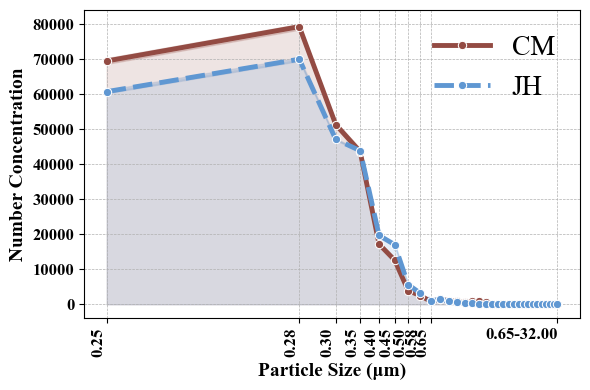

In [11]:
palette=['#934B43','#5F97D2']

# 创建新的非线性分布 x 轴值
compressed_positions = np.linspace(0, 1, len(size_columns))**0.25 * max(size_columns)
position_mapping = dict(zip(size_columns, compressed_positions))
data_long["Compressed Size"] = data_long["Size (μm)"].map(position_mapping)  # 映射到新的压缩位置

# Filtering tick positions and labels to remove those after 0.65 and label as '0.65-32.00'
size_limit = 0.65
filtered_positions = [pos for pos, size in zip(compressed_positions, size_columns) if size <= size_limit]
filtered_positions.append(compressed_positions[-1])  # Add the last position for "0.65-32.00" label

filtered_labels = [f"{size:.2f}" for size in size_columns if size <= size_limit]
filtered_labels.append("")  # 最后一个标签留空，我们用 plt.text 手动添加

mean_data_long = data_long.groupby(["Compressed Size", "place"], as_index=False)["Concentration"].mean()


# 绘图
plt.figure(figsize=(6, 4))
sns.lineplot(data=data_long, x="Compressed Size", y="Concentration", hue="place", marker="o", style="place",palette=palette,linewidth=3.5)

# Manually fill the area under each line to match the line colors, using the averaged data
for (place, color) in zip(mean_data_long['place'].unique(), palette):
    subset = mean_data_long[mean_data_long['place'] == place]
    plt.fill_between(subset['Compressed Size'], subset['Concentration'], color=color, alpha=0.15)

# Set custom x-axis ticks and labels
plt.xticks(filtered_positions, filtered_labels, rotation=90, ha='right', fontsize=12, fontweight='bold')
# 在 x 轴的最后部分中心添加 "0.65-32.00" 标签
plt.text(filtered_positions[-1], -10000, "0.65-32.00", ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# 设置标签和标题，以符合SCI风格
plt.xlabel("Particle Size (μm)", fontsize=14, fontweight='bold')
plt.ylabel("Number Concentration", fontsize=14, fontweight='bold')
plt.title("", fontsize=16, fontweight='bold')

# 添加网格和图例
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="",loc='upper right', ncol=1, frameon=False, fontsize=20)

# 调整布局
plt.tight_layout()
plt.savefig('粒径分布.svg', format='svg', bbox_inches='tight')
plt.show()

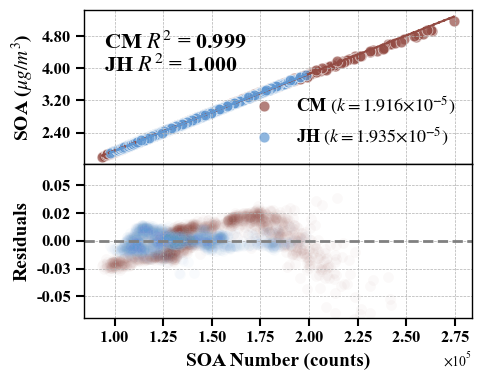

In [12]:
from scipy.stats import zscore
# 定义异常值清理函数
def clean_data(df, columns, threshold=3):
    for col in columns:
        df = df[np.abs(zscore(df[col])) < threshold]
    return df.reset_index(drop=True)

# dataall = clean_data(dataall,["SOA","CSOA"])
from decimal import Decimal

rall=[]
# 设置图形和子图
fig, axs = plt.subplots(2, 1, figsize=(5, 4), sharex=True)
palette = {'CM': '#934B43', 'JH': '#5F97D2'}  # 定义每个地点的颜色

for place, color in palette.items():
    # 筛选出当前地点的数据
    data_subset = dataall[dataall['place'] == place]
    x = data_subset["CSOA"].values.reshape(-1, 1)
    y = data_subset["SOA"].values

    # 线性回归模型
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # 计算 R2 和回归系数 k
    r2 = r2_score(y, y_pred)
    k = model.coef_[0]

    # 绘制回归图
    k_formatted = (f"{Decimal(k):.3e}"+'}').replace("e", "×10^{")
    axs[0].scatter(x, y, alpha=0.7, edgecolors='w', linewidth=0.5, color=color, label=f"{place} $(k={k_formatted})$",s=60)
    axs[0].plot(x, y_pred, color=color, linestyle='--')
    axs[0].text(0.05, 0.75 - 0.15 * list(palette.keys()).index(place), f"{place} $R^2$ = {r2:.3f}",
                transform=axs[0].transAxes, fontsize=16, color='black', fontweight='bold')

    # 绘制残差图
    residuals = y - y_pred
    axs[1].scatter(x, residuals, alpha=0.03, edgecolors='w', linewidth=0.5, color=color, s=60)
    rall.append(residuals)

# 设置上图的标签和图例
axs[0].set_ylabel('SOA ($μg/m^3$)', fontsize=14, fontweight='bold', color='black')
axs[0].legend(loc='lower right', fontsize=13, frameon=False, prop={'size': 13, 'weight': 'bold'})

# 设置残差图的标签
axs[1].axhline(0, color='gray', linestyle='--', lw=2)
axs[1].set_xlabel('SOA Number (counts)', fontsize=14, fontweight='bold', color='black')
axs[1].set_ylabel('Residuals', fontsize=14, fontweight='bold', color='black')

rallmean=np.mean(rall)
rallstd=np.std(rall)
axs[1].set_ylim(rallmean-5*rallstd,rallmean+5*rallstd)


# 格式化和网格设置
for ax in axs:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', labelsize=12, color='black', width=1.5, length=6)
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
        
        
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_color('black')  # 确保颜色为黑色

    formatter = ScalarFormatter(useOffset=True, useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, 4))
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=8))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

plt.subplots_adjust(hspace=0)  # 调整子图之间的垂直间距
plt.savefig('SOA浓度关系.svg', format='svg', bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_25792\1882067874.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Temperature Range'] = pd.Categorical(
C:\Users\aa271\AppData\Local\Temp\ipykernel_25792\1882067874.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for color, (temp_range, group) in zip(palette, subset.groupby("Temperature Range")):


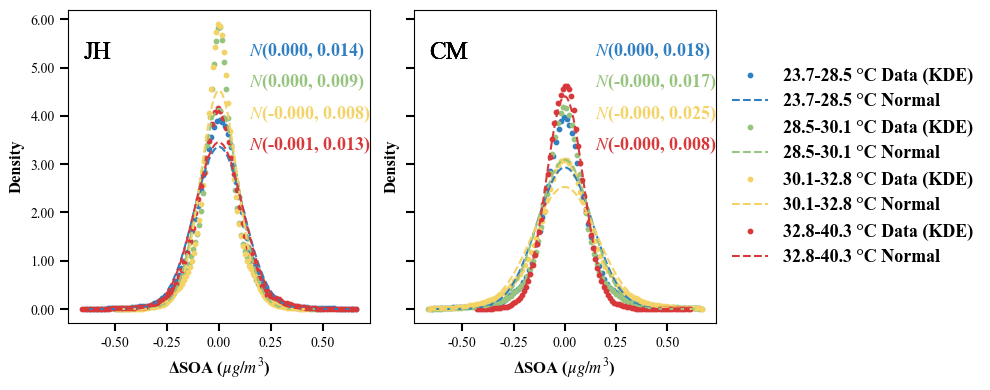

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde, norm


data=datav.copy()
# Ensure Time column is in datetime format and calculate ΔSOA
data['Time'] = pd.to_datetime(data['Time'])
data = data.sort_values(['place', 'Time'])
data['ΔSOA'] = data.groupby('place')['SOA'].diff().fillna(0)

data = clean_data(data,['ΔSOA'],threshold=4)


# Normalize ΔSOA
scaler = StandardScaler()

# Divide Temperature into 4 bins, equally splitting data by quantity
temperature_bins, bins = pd.qcut(data['Temperature'], 4, retbins=True)
temperature_ranges = [f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)]
data['Temperature Range'] = pd.cut(data['Temperature'], bins=bins, labels=temperature_ranges)

# Create ordered categories for Temperature Range by highest value
data['Temperature Range'] = pd.Categorical(
    data['Temperature Range'],
    categories=sorted(temperature_ranges, key=lambda x: float(x.split('-')[1])),
    ordered=True
)

palette = ['#2F7FC1','#96C37D','#F3D266','#D8383A']

# Create figure for plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
for ax, place in zip(axes, ['JH', 'CM']):
    subset = data[data['place'] == place]
    
    # Create ordered categories for Temperature Range by highest value
    subset['Temperature Range'] = pd.Categorical(
    subset['Temperature Range'],
    categories=sorted(temperature_ranges, key=lambda x: float(x.split('-')[1])),
    ordered=True
)
    
    # subset =subset.groupby(["Temperature Range",'Hour_Min']).mean(numeric_only=True).reset_index()
    i=0
    
    
    for color, (temp_range, group) in zip(palette, subset.groupby("Temperature Range")):
        # KDE for actual data points
        kde = gaussian_kde(group["ΔSOA"].replace([np.inf, -np.inf], np.nan).dropna())
        x_vals = np.linspace(group["ΔSOA"].min(), group["ΔSOA"].max(), 100)
        kde_vals = kde(x_vals)
        
        # Plot KDE as scatter points for actual data distribution
        ax.scatter(x_vals, kde_vals, color=color, alpha=1, s=10, label=f"{temp_range} °C Data (KDE)")

        # Plot Gaussian fit based on the mean and std
        mean, std = group["ΔSOA"].mean(), group["ΔSOA"].std()
        y_vals = norm.pdf(x_vals, mean, std)
        ax.plot(x_vals, y_vals, linestyle='--', color=color, linewidth=1.5, label=f"{temp_range} °C Normal")

        # Left corner annotation for N(μ, σ²)
        # text = f"{temp_range}: N({mean:.2f}, {std**2:.2f})"
        text = f"$N$({mean:.3f}, {std**2:.3f})"
        
        ax.text(0.6, 0.9 - 0.1 * i,
                text, transform=ax.transAxes, fontsize=13, va='top', color=color, fontweight='bold')
        ax.text(0.05, 0.9,
                place, transform=ax.transAxes, fontsize=18, va='top', color='black')
        i+=1

    # Set title and labels
    ax.set_xlabel("ΔSOA ($μg/m^3$)", fontsize=12, fontweight='bold')
    ax.set_ylabel("Density", fontsize=12, fontweight='bold')
    
    # Format x and y ticks to 2 decimal places and make them bold
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}"))
    ax.tick_params(axis='both', which='major', labelsize=10, width=1.5, length=6, labelcolor='black')


# Legend for right plot only, positioned outside the plot area
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="", frameon=False, prop={'size': 13, 'weight': 'bold'})
plt.tight_layout()
plt.savefig('SOA变化率.svg', format='svg', bbox_inches='tight')
plt.show()

